<a href="https://colab.research.google.com/github/piyushrockzz/ExcelR-Projects-/blob/main/Assignment_4b_(_Simple_Linear_Regression_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import statsmodels.formula.api as smf

# Question:2 with delivery_time data

In [ ]:
delivery = pd.read_csv("D:\Excel R Course\Assignments\Assignment 4 ( Simple Linear Regression)\delivery_time.csv")

In [ ]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [ ]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
delivery = delivery.rename({'Delivery Time' : 'delivery_time', 'Sorting Time': 'sorting_time'},axis = True)

In [ ]:
delivery.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


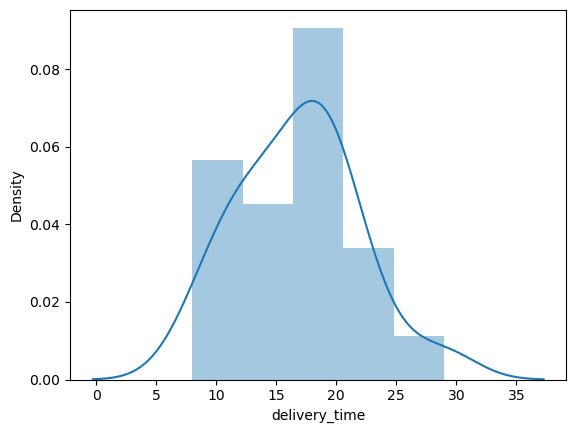

In [ ]:
sns.distplot(delivery.delivery_time)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


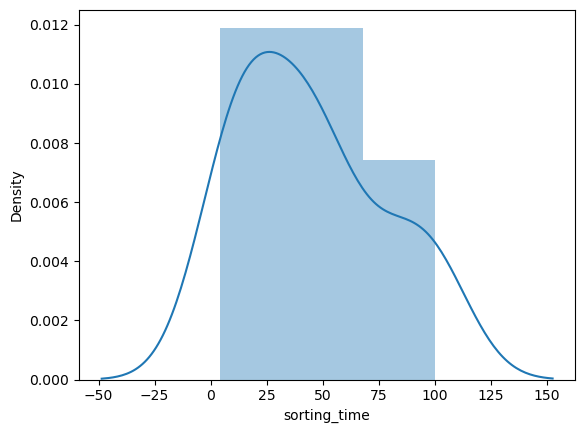

In [ ]:
sns.distplot(delivery.sorting_time)
plt.show()

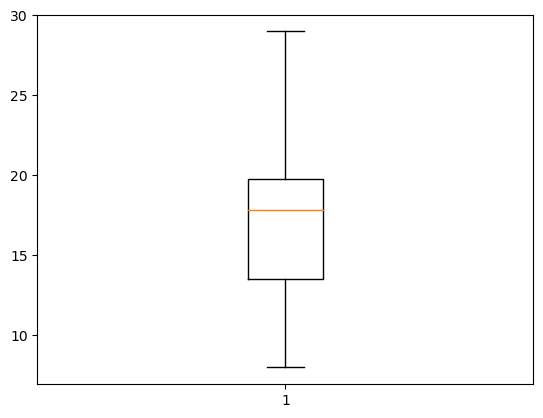

In [ ]:
plt.boxplot(delivery.delivery_time)
plt.show()

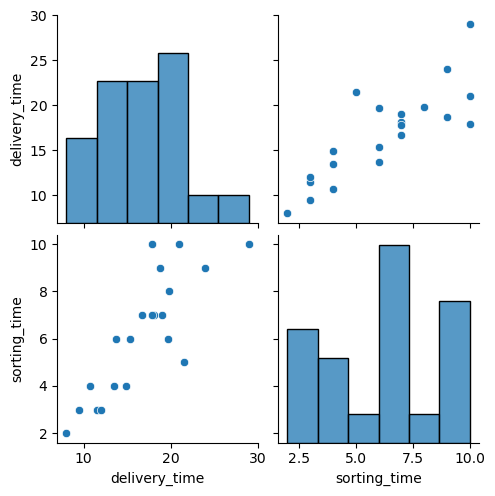

In [ ]:
sns.pairplot(delivery)

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

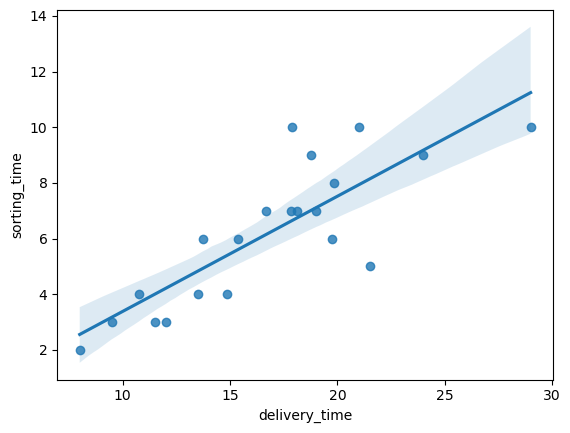

In [ ]:
sns.regplot(x = delivery.delivery_time, y = delivery.sorting_time)

In [ ]:
delivery.sorting_time.corr(delivery.delivery_time)   # correlation value between X and Ys

0.7939062801002797

In [ ]:
delivery.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


# Model Building

In [ ]:
# Linear Model

import statsmodels.formula.api as smf

model = smf.ols('delivery_time~sorting_time', data = delivery).fit()

# Model Testing

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
model.rsquared, model.rsquared_adj   # efficency/accuaracy of good fit


(0.6822714748417231, 0.6655489208860244)

In [ ]:
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        16:30:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model prediction

In [ ]:
pred = ( 6.582734 + 1.649020)*5
pred

41.158770000000004

In [ ]:
pred1 = model.predict()
pred1

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

# Transforming variables for accuracy

# 1. Log Transformation

In [ ]:
model2 = smf.ols("delivery_time~np.log(sorting_time)", data = delivery).fit()

In [ ]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.64e-06
Time:                        16:36:13   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(sorting_time),6.16977,11.917057


In [ ]:
pred2 = model2.predict(pd.DataFrame(delivery.sorting_time))

pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'Sorting Time')

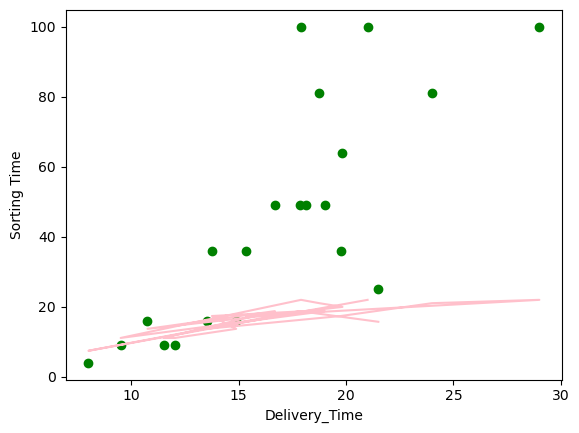

In [ ]:
plt.scatter(x = delivery['delivery_time'], y = delivery['sorting_time'],color='green');
plt.plot(delivery['delivery_time'],pred2,color='pink');
plt.xlabel('Delivery_Time');
plt.ylabel('Sorting Time')

# 2. Exponential transformation

In [ ]:
model3 = smf.ols('np.log(delivery_time)~sorting_time', data = delivery).fit()

In [ ]:
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 14 Jun 2023   Prob (F-statistic):           1.59e-06
Time:                           16:47:01   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred3 = model3.predict(pd.DataFrame(delivery['sorting_time']))

pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [ ]:
pred_log = np.exp(pred3)    # as we have used log(salary) in preparing model so we need to convert it back

pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

Text(0, 0.5, 'Sorting Time')

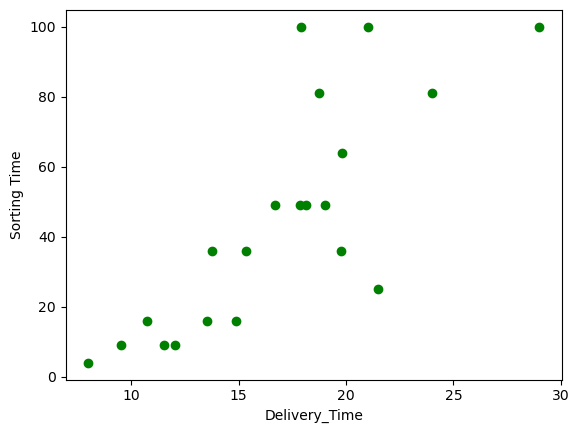

In [ ]:
plt.scatter(x = delivery['delivery_time'], y = delivery['sorting_time'],color='green');
plt.plot(delivery['delivery_time'],np.exp(pred_log),color='blue');
plt.xlabel('Delivery_Time');
plt.ylabel('Sorting Time')

In [ ]:
resid3 = pred3-delivery.delivery_time

resid3

0     2.972032
1    -0.774877
2    -4.033966
3    -2.429293
4    -5.027968
5     0.366034
6    -1.534403
7     1.950423
8     6.072032
9     2.820707
10   -0.420073
11    1.975123
12    0.785597
13   -0.049577
14   -0.579577
15   -2.154877
16    1.966034
17   -0.644403
18    2.303411
19   -0.364403
20   -7.358272
dtype: float64

# Quadratic Model

In [ ]:
delivery['sorting_time_sq'] = delivery.sorting_time*delivery.sorting_time

In [ ]:
model4 = smf.ols('delivery_time~sorting_time+sorting_time_sq', data = delivery).fit()

In [ ]:
model4.params

Intercept          9.191804
sorting_time       0.250585
sorting_time_sq   -0.001194
dtype: float64

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     18.56
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           4.22e-05
Time:                        16:53:15   Log-Likelihood:                -51.645
No. Observations:                  21   AIC:                             109.3
Df Residuals:                      18   BIC:                             112.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.1918      1.758      5.228      0.000       5.498      12.886
sorting_time        0.2506      0.084      2.975      0.008       0.074       0.428
sorting_time_sq    -0.0012      0.001     -1.542      0.140      -0.003       0.000
==============================================================================
Omnibus:                        6.116   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                4.021
Skew:                           1.028   Prob(JB):                        0.134
Kurtosis:                       3.609   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred4 = model4.predict()
pred4

array([22.309679  , 12.89547757, 16.66534799, 21.65493759, 22.309679  ,
       16.66534799, 18.603513  , 11.35034601, 22.309679  , 21.65493759,
       20.338353  , 12.89547757, 18.603513  , 11.35034601, 11.35034601,
       12.89547757, 16.66534799, 18.603513  , 10.17503715, 18.603513  ,
       14.71013097])

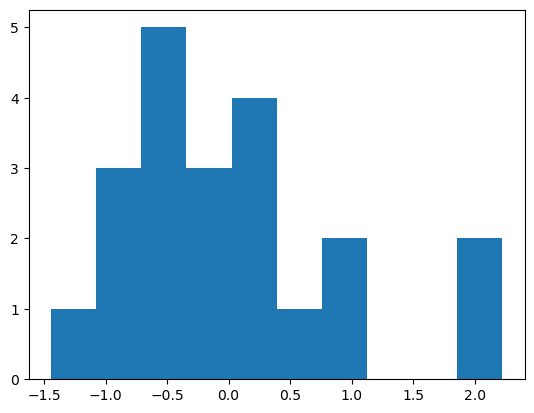

In [ ]:
# histogram for residual values

plt.hist(model4.resid_pearson)
plt.show()